In [1]:
#mamba install intake
#mamba install -c conda-forge intake-esm

In [1]:
import pandas as pd
import os, glob
import numpy as np
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt

pd_hf_ecstcr = pd.read_csv('housfather_supplements_ecstcr.csv', header=2)
pd_hf_ecstcr = pd_hf_ecstcr.iloc[:58]
pd_hf_ecstcr = pd_hf_ecstcr.set_index(['Model Name'])

In [2]:
pd_hf_ssp126 = pd.read_csv('housfather_supplements_ssp126.csv', header=0)
pd_hf_ssp126 = pd_hf_ssp126.set_index('Unnamed: 0', drop=True)#.T
#pd_hf_ecstcr = pd_hf_ecstcr.iloc[:58]
#pd_hf_ecstcr = pd_hf_ecstcr.set_index(['Model Name'])
pd_hf_ssp126_2071_2100 = pd_hf_ssp126.loc[2071:2100].mean()

pd_hf_ssp245 = pd.read_csv('housfather_supplements_ssp245.csv', header=0)
pd_hf_ssp245 = pd_hf_ssp245.set_index('Unnamed: 0', drop=True)#.T
#pd_hf_ecstcr = pd_hf_ecstcr.iloc[:58]
#pd_hf_ecstcr = pd_hf_ecstcr.set_index(['Model Name'])
pd_hf_ssp245_2071_2100 = pd_hf_ssp245.loc[2071:2100].mean()

pd_hf_ssp370 = pd.read_csv('housfather_supplements_ssp370.csv', header=0)
pd_hf_ssp370 = pd_hf_ssp370.set_index('Unnamed: 0', drop=True)#.T
#pd_hf_ecstcr = pd_hf_ecstcr.iloc[:58]
#pd_hf_ecstcr = pd_hf_ecstcr.set_index(['Model Name'])
pd_hf_ssp370_2071_2100 = pd_hf_ssp370.loc[2071:2100].mean()

pd_hf_ssp585 = pd.read_csv('housfather_supplements_ssp585.csv', header=0)
pd_hf_ssp585 = pd_hf_ssp585.set_index('Unnamed: 0', drop=True)#.T
#pd_hf_ecstcr = pd_hf_ecstcr.iloc[:58]
#pd_hf_ecstcr = pd_hf_ecstcr.set_index(['Model Name'])
pd_hf_ssp585_2071_2100 = pd_hf_ssp585.loc[2071:2100].mean()

In [3]:
pd_cmip6_oggm = pd.read_csv('/home/www/oggm/cmip6/all_gcm_list.csv')
oggm_cmip6_gcms = list(pd_cmip6_oggm.folder.unique())
primary_isimip3b_gcms_l = ['GFDL-ESM4', 'IPSL-CM6A-LR', 'MPI-ESM1-2-HR', 'MRI-ESM2-0', 'UKESM1-0-LL' ]
primary_isimip3b_gcms = {}
for g in primary_isimip3b_gcms_l:
    if g == 'UKESM1-0-LL':
        primary_isimip3b_gcms[g] = "r1i1p1f2"
    else:
        primary_isimip3b_gcms[g] = "r1i1p1f1"
secondary_isimip3b_gcms = {"CanESM5":"r1i1p1f1", "CESM2-WACCM":"r1i1p1f1", "CNRM-CM6-1": "r1i1p1f2",
     "CNRM-ESM2-1": "r1i1p1f2", "EC-Earth3":"r1i1p1f1", "IITM-ESM":"r1i1p1f1", 
           "KACE-1-0-G":"r1i1p1f1", # kace-1-0-g
           "MIROC6":"r1i1p1f1",
           "TaiESM1":"r1i1p1f1",
          }
oggm_cmip6_gcms_w_isimip3b = np.concatenate([oggm_cmip6_gcms, list(primary_isimip3b_gcms.keys())])
oggm_cmip6_gcms_w_isimip3b = np.concatenate([oggm_cmip6_gcms_w_isimip3b, list(secondary_isimip3b_gcms.keys())])

In [4]:
pd_cmip6_gcms_stats = pd.DataFrame(index=list(set(oggm_cmip6_gcms_w_isimip3b)))
pd_cmip6_gcms_stats['oggm_cluster_available'] = 'Y'
pd_cmip6_gcms_stats['member'] = "r1i1p1f1"
for g in primary_isimip3b_gcms.keys():
    pd_cmip6_gcms_stats.loc[g,'member'] = primary_isimip3b_gcms[g]
for g in secondary_isimip3b_gcms.keys():
    pd_cmip6_gcms_stats.loc[g,'member'] = secondary_isimip3b_gcms[g]
### add isimip3b primary gcms
pd_cmip6_gcms_stats.loc[primary_isimip3b_gcms.keys(), 'isimip3b'] = 'Y_primary'
pd_cmip6_gcms_stats.loc[secondary_isimip3b_gcms.keys(), 'isimip3b'] = 'Y_secondary'

In [5]:
### used in Rounce et al
rounce_2023 = ['BCC-CSM2-MR', 'CESM2', 'CESM2-WACCM', 'EC-Earth3', 'EC-Earth3-Veg', 'FGOALS-f3-L', 'GFDL-ESM4', 'INM-CM4-8', 'INM-CM5-0', 'MPI-ESM1-2-HR', 'MRI-ESM2-0', 'NorESM2-MM']

In [6]:
pd_rounce_2023 = pd.DataFrame(index=rounce_2023)
pd_rounce_2023['rounce_2023'] = 'Y'

In [7]:
for g in rounce_2023:
    pd_cmip6_gcms_stats.loc[g,'rounce_2023']='Y'

In [8]:
### additional GCMs used by Matthews 
matthews_et_al_only = {'ACCESS-ESM1-5':"r1i1p1f1",
                  'CanESM5':"r1i1p1f1",#-1', Iguess it is the sameas"-1"
                  'GISS-E2-1-G':"r1i1p1f2",
                  'MIROC-ES2L':"r1i1p1f2",
                  'IPSL-CM6A-LR':"r1i1p1f1"}
#MPI-ESM1-2-LR ,

In [9]:
for m in matthews_et_al_only.keys():
    pd_cmip6_gcms_stats.loc[m,'matthews_et_al_2025'] = 'Y'
    pd_cmip6_gcms_stats.loc[m,'member'] = matthews_et_al_only[m]

pd_cmip6_gcms_stats.loc[rounce_2023,'matthews_et_al_2025'] = 'Y'


In [10]:
pd_cmip6_gcms_stats['TCR (likely) 1.4-2.2°'] = pd_hf_ecstcr.loc[pd_cmip6_gcms_stats.index, ['TCR Screen (likely) 1.4-2.2º']]
pd_cmip6_gcms_stats['ECS (likely) 2.5-4.0°'] = pd_hf_ecstcr.loc[pd_cmip6_gcms_stats.index, ['ECS Screen (likely) 2.5-4.0ºC']]
for c in ['ECS150','TCR']:
    pd_cmip6_gcms_stats[c] = pd_hf_ecstcr.loc[pd_cmip6_gcms_stats.index, [c]]

pd_cmip6_gcms_stats = pd_cmip6_gcms_stats.sort_index()

In [11]:
pd_cmip6_gcms_stats.loc[pd_cmip6_gcms_stats.isimip3b == 'Y_primary', 'daily_available'] = 'Y'
pd_cmip6_gcms_stats.loc[pd_cmip6_gcms_stats.isimip3b == 'Y_secondary', 'daily_available'] = 'Y'
models_scen_isimip3b_gcms = {
    "IPSL-CM6A-LR": ["historical", "ssp119", "ssp126", "ssp245",  "ssp370", "ssp460", "ssp534-over", "ssp585"],
    "CanESM5":      ["historical", "ssp126", "ssp370", "ssp534-over", "ssp585"],
    "CESM2-WACCM":  ["historical", "ssp126", "ssp245", "ssp370", "ssp585"],
    "CNRM-CM6-1":   ["historical", "ssp126", "ssp370", "ssp585"],
    "CNRM-ESM2-1":  ["historical", "ssp126", "ssp370", "ssp534-over", "ssp585"],
    "EC-Earth3":    ["historical", "ssp126", "ssp370", "ssp585"],
    "GFDL-ESM4":    ["historical", "ssp119",  "ssp126", "ssp245", "ssp370", "ssp585"],
    "IITM-ESM":     ["historical", "ssp126", "ssp245", "ssp370", "ssp585"],
    "KACE-1-0-G":   ["historical", "ssp126", "ssp245", "ssp370", "ssp585"],
    "MIROC6":       ["historical", "ssp126", "ssp370", "ssp585"],
    "MPI-ESM1-2-HR": ["historical",  "ssp126", "ssp245", "ssp370", "ssp585"],
    "MRI-ESM2-0":   ["historical", "ssp119", "ssp126", "ssp245", "ssp370", "ssp460", "ssp534-over", "ssp585"],
    "TaiESM1":      ["historical", "ssp126", "ssp245", "ssp370", "ssp585"],
    "UKESM1-0-LL":  ["historical", "ssp119", "ssp126", "ssp245",  "ssp370", "ssp534-over", "ssp585"]
}

for m in models_scen_isimip3b_gcms.keys():
    for s in models_scen_isimip3b_gcms[m]:
        for ss in ["ssp119", "ssp126", "ssp245",  "ssp370", "ssp460", "ssp534-over", "ssp585"]:
            if ss in models_scen_isimip3b_gcms[m]:
                pd_cmip6_gcms_stats.loc[m, ss] = 'Y'
### TODO --> need to check what else is available
### add variable column (t,pr, rh, wind speed, pressure, lw,sw radiation)
### add available scenarios ... 
# manual check of those gcms not available from ISIMIP
keys_d = pd_cmip6_gcms_stats.loc[pd_cmip6_gcms_stats.daily_available.isna()].index

# oggm gcms... 
for m in pd_cmip6_oggm.gcm.unique():
    for ss in ["ssp119", "ssp126", "ssp245",  "ssp370", "ssp460", "ssp534-over", "ssp585"]:
        if m in pd_cmip6_oggm.loc[pd_cmip6_oggm.ssp==ss].gcm.unique():
            pd_cmip6_gcms_stats.loc[m, ss] = 'Y'
## rounce 119:EC-Earth3, EC-Earth3-Veg, GFDL-ESM4, MRI-ESM2-0

### EC-Earth3 ssp119 available in Rounce et al.2023 but in OGGM only available for r1i1p1f1 	!!! 
pd_cmip6_gcms_stats.loc['EC-Earth3', ['ssp119']] = 'Y_not_oggm_cluster'
pd_cmip6_gcms_stats = pd_cmip6_gcms_stats.fillna('N')

In [12]:
# only checked for temperature on daily resolution 
keys_daily = {'ACCESS-CM2':'Y', #ESGF
 'ACCESS-ESM1-5':'Y',#ESGF
 'BCC-CSM2-MR':'Y',#ESGF
 'CAMS-CSM1-0':'Y_r1i1p1f2', # N on ESGF,Y onCopernicus but only for temp, prcp, othervariablesmissing #ESGF , Y for r1i1p1f2
 'CESM2':'Y_r4i1p1f1', #N on  ESGF for allvariables, N on COPERNICUS, Y only for r10i1p1f1, r11i1p1f1, r4i1p1f1
'CMCC-CM2-SR5':'Y',
 'EC-Earth3-Veg':'Y',
 'FGOALS-f3-L':'Y',
 'GISS-E2-1-G':'Y_r1i1p1f2', #N onCopernicus, N on ESGF,  Y if using second ensemble member GISS-E2-1-G.ssp126.r1i1p1f2.
       'INM-CM4-8':'Y',
 'INM-CM5-0':'Y',
 'MIROC-ES2L':'Y_r1i1p1f2', # #N onCopernicus, N on ESGF, Y for r1i1p1f2
 'NorESM2-MM':'Y'}
for m in keys_daily.keys():
    pd_cmip6_gcms_stats.loc[m,'daily_available'] = keys_daily[m]

ISIMIP3B variables
huss (near-surface specific humidity), hurs (near-surface relative humidity), pr (total precipitation), prsn (snowfall), ps (surface air pressure)
rlds (downwelling long-wave radiation), rsds (downwelling short-wave radiation), sfcWind (near-surface wind speed), tas (near-surface air temperature), tasmax, tasmin (daily max/min temperatures)

--> two from Matthews et al are currently not in OGGM cluster, but they are only available on daily scales for other ensemblemembers

In [13]:
pd_cmip6_gcms_stats[['ECS150','TCR']] = pd_cmip6_gcms_stats[['ECS150','TCR']].astype(float)

In [26]:
pd_cmip6_gcms_stats.loc[pd_cmip6_gcms_stats.isimip3b=='Y_primary'].sort_values(by='ssp126_2100_warming').T

GFDL-ESM4 MPI-ESM1-2-HR MRI-ESM2-0 IPSL-CM6A-LR  \
oggm_cluster_available          Y             Y          Y            Y   
member                   r1i1p1f1      r1i1p1f1   r1i1p1f1     r1i1p1f1   
isimip3b                Y_primary     Y_primary  Y_primary    Y_primary   
rounce_2023                     Y             Y          Y            N   
matthews_et_al_2025             Y             Y          Y            Y   
TCR (likely) 1.4-2.2°           Y             Y          Y            N   
ECS (likely) 2.5-4.0°           Y             Y          Y            N   
ECS150                       2.65          2.98       3.13          4.7   
TCR                          1.63          1.64       1.67         2.35   
daily_available                 Y             Y          Y            Y   
ssp119                          Y             N          Y            Y   
ssp126                          Y             Y          Y            Y   
ssp245                          Y             Y          Y            Y   
ssp370                          Y             Y          Y            Y   
ssp460                          N             N          Y            Y   
ssp534-over                     N             N          Y            Y   
ssp585                          Y             Y          Y            Y   
ssp585_2100_warming          3.48          3.61       4.12         5.61   
ssp126_2100_warming          1.42          1.57       1.77         2.29   
ssp245_2100_warming          2.19          2.34       2.63         3.45   
ssp370_2100_warming           3.1          3.18       3.43         4.52   

                       UKESM1-0-LL  
oggm_cluster_available           Y  
member                    r1i1p1f2  
isimip3b                 Y_primary  
rounce_2023                      N  
matthews_et_al_2025              N  
TCR (likely) 1.4-2.2°            N  
ECS (likely) 2.5-4.0°            N  
ECS150                        5.36  
TCR                           2.77  
daily_available                  Y  
ssp119                           Y  
ssp126                           Y  
ssp245                           Y  
ssp370                           Y  
ssp460                           N  
ssp534-over                      Y  
ssp585                           Y  
ssp585_2100_warming           6.19  
ssp126_2100_warming           2.76  
ssp245_2100_warming           3.96  
ssp370_2100_warming           5.21

In [15]:
len(pd_cmip6_gcms_stats.index.unique())

27

In [16]:
for m in pd_cmip6_gcms_stats.index:
    pd_cmip6_gcms_stats.loc[m, 'ssp585_2100_warming'] = pd_hf_ssp585_2071_2100[m].round(2)
    pd_cmip6_gcms_stats.loc[m, 'ssp585'] = 'Y'

for m in pd_cmip6_gcms_stats.index:
    pd_cmip6_gcms_stats.loc[m, 'ssp126_2100_warming'] = pd_hf_ssp126_2071_2100[m].round(2)
    pd_cmip6_gcms_stats.loc[m, 'ssp126'] = 'Y'

for m in pd_cmip6_gcms_stats.index:
    pd_cmip6_gcms_stats.loc[m, 'ssp245_2100_warming'] = pd_hf_ssp245_2071_2100[m].round(2)
    pd_cmip6_gcms_stats.loc[m, 'ssp245'] = 'Y'

for m in pd_cmip6_gcms_stats.index:
    pd_cmip6_gcms_stats.loc[m, 'ssp370_2100_warming'] = pd_hf_ssp370_2071_2100[m].round(2)
    pd_cmip6_gcms_stats.loc[m, 'ssp370'] = 'Y'


In [17]:
pd_cmip6_gcms_stats.to_csv('climate_model_overview.csv')

1.4 2.2
2.5 4.0


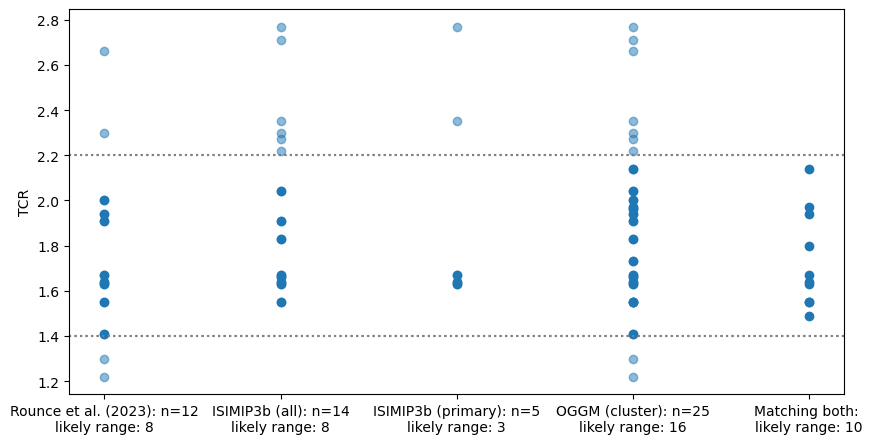

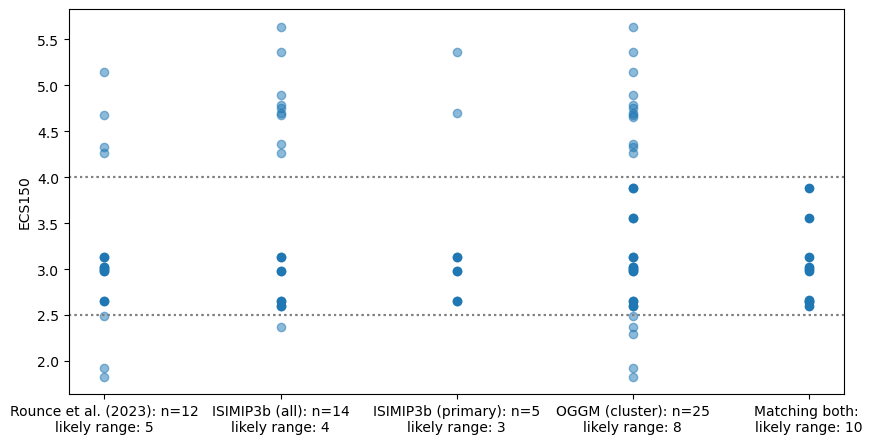

In [18]:
for var in ['TCR','ECS150']:
    plt.figure(figsize=(10,5))
    if var == 'ECS150':
        var2 = 'ECS (likely) 2.5-4.0°'
        ylim_0 = 2.5
        ylim_1 = 4.0
    elif var == 'TCR':
        var2 = 'TCR (likely) 1.4-2.2°'
        ylim_0 = 1.4
        ylim_1 = 2.2
    plt.axhline(ylim_0,ls=':', color='grey')
    plt.axhline(ylim_1,ls=':', color='grey')
    print(ylim_0, ylim_1)
    _sel = pd_cmip6_gcms_stats.loc[(pd_cmip6_gcms_stats.rounce_2023 =='Y') & (pd_cmip6_gcms_stats[var2] == 'Y')]
    _sel_all = pd_cmip6_gcms_stats.loc[(pd_cmip6_gcms_stats.rounce_2023 =='Y')]
    plt.plot(np.repeat(f'Rounce et al. (2023): n={len(_sel_all)}\nlikely range: {len(_sel)}', len(_sel[var])), _sel[var],'o', c='C0')
    plt.plot(np.repeat(f'Rounce et al. (2023): n={len(_sel_all)}\nlikely range: {len(_sel)}', len(_sel_all[var])), _sel_all[var],'o', c='C0', alpha = 0.5)

    _sel = pd_cmip6_gcms_stats.loc[((pd_cmip6_gcms_stats.isimip3b =='Y_primary') | (pd_cmip6_gcms_stats.isimip3b =='Y_secondary')) & (pd_cmip6_gcms_stats[var2] == 'Y')]
    _sel_all = pd_cmip6_gcms_stats.loc[((pd_cmip6_gcms_stats.isimip3b =='Y_primary') | (pd_cmip6_gcms_stats.isimip3b =='Y_secondary'))]
    plt.plot(np.repeat(f'ISIMIP3b (all): n={len(_sel_all)}\nlikely range: {len(_sel)}', len(_sel[var])), _sel[var],'o', c='C0')
    plt.plot(np.repeat(f'ISIMIP3b (all): n={len(_sel_all)}\nlikely range: {len(_sel)}', len(_sel_all[var])), _sel_all[var],'o', c='C0', alpha = 0.5)

    _sel = pd_cmip6_gcms_stats.loc[((pd_cmip6_gcms_stats.isimip3b =='Y_primary')) & (pd_cmip6_gcms_stats[var2] == 'Y')]
    _sel_all = pd_cmip6_gcms_stats.loc[((pd_cmip6_gcms_stats.isimip3b =='Y_primary'))]
    plt.plot(np.repeat(f'ISIMIP3b (primary): n={len(_sel_all)}\nlikely range: {len(_sel)}', len(_sel[var])), _sel[var],'o', c='C0')
    plt.plot(np.repeat(f'ISIMIP3b (primary): n={len(_sel_all)}\nlikely range: {len(_sel)}', len(_sel_all[var])), _sel_all[var],'o', c='C0', alpha = 0.5)

    _sel = pd_cmip6_gcms_stats.loc[(pd_cmip6_gcms_stats.oggm_cluster_available =='Y') & (pd_cmip6_gcms_stats[var2] == 'Y')]
    _sel_all = pd_cmip6_gcms_stats.loc[(pd_cmip6_gcms_stats.oggm_cluster_available =='Y')]
    plt.plot(np.repeat(f'OGGM (cluster): n={len(_sel_all)}\nlikely range: {len(_sel)}', len(_sel[var])), _sel[var],'o', c='C0')
    plt.plot(np.repeat(f'OGGM (cluster): n={len(_sel_all)}\nlikely range: {len(_sel)}', len(_sel_all[var])), _sel_all[var],'o', c='C0', alpha = 0.5)

    both_matching_sel = pd_cmip6_gcms_stats.loc[(pd_cmip6_gcms_stats['ECS (likely) 2.5-4.0°'] == 'Y')  & (pd_cmip6_gcms_stats['TCR (likely) 1.4-2.2°'] == 'Y')]
    plt.plot(np.repeat(f'Matching both: \nlikely range: {len(both_matching_sel)}', len(both_matching_sel[var])), both_matching_sel[var],'o', c='C0')

    plt.ylabel(var)
    plt.axhline(ylim_0,ls=':', color='grey')
    plt.axhline(ylim_1,ls=':', color='grey')
    # TCR → Short-term warming (ocean still absorbing much of the heat).
    # ECS150 → Intermediate warming after some ocean equilibration.

Text(75.84722222222221, 0.5, 'Global warming (2071-2100, °C)')

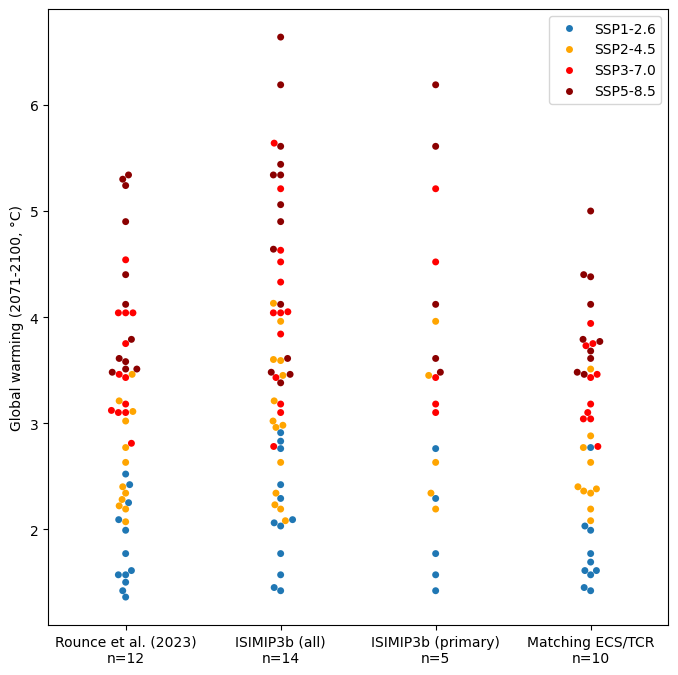

In [19]:
plt.figure(figsize=(8,8))

_s = pd_cmip6_gcms_stats.loc[(pd_cmip6_gcms_stats.rounce_2023 =='Y')] # & (pd_cmip6_gcms_stats[var2] == 'Y')]
x = 0 #
_ss = _s[['ssp126_2100_warming','ssp245_2100_warming','ssp370_2100_warming','ssp585_2100_warming']].melt()
sns.swarmplot(x= np.repeat(x,len(_ss)), y=_ss['value'], hue =_ss['variable'], palette=['C0', 'orange', 'red', 'darkred'])
#sns.boxplot(x= np.repeat(x,len(_ss)), y=_ss['value'], hue =_ss['variable'], palette=['C0', 'orange', 'red', 'darkred'], alpha = 0.1)


_s = pd_cmip6_gcms_stats.loc[((pd_cmip6_gcms_stats.isimip3b =='Y_primary') | (pd_cmip6_gcms_stats.isimip3b =='Y_secondary'))]
x = 1 #
_ss = _s[['ssp126_2100_warming','ssp245_2100_warming','ssp370_2100_warming','ssp585_2100_warming']].melt()
sns.swarmplot(x= np.repeat(x,len(_ss)), y=_ss['value'], hue =_ss['variable'], palette=['C0', 'orange', 'red', 'darkred'])


_s = pd_cmip6_gcms_stats.loc[(pd_cmip6_gcms_stats.isimip3b =='Y_primary')] # & (pd_cmip6_gcms_stats[var2] == 'Y')]
x = 2 #
_ss = _s[['ssp126_2100_warming','ssp245_2100_warming','ssp370_2100_warming','ssp585_2100_warming']].melt()
sns.swarmplot(x= np.repeat(x,len(_ss)), y=_ss['value'], hue =_ss['variable'], palette=['C0', 'orange', 'red', 'darkred'])

_s = both_matching_sel
x = 3 #
_ss = _s[['ssp126_2100_warming','ssp245_2100_warming','ssp370_2100_warming','ssp585_2100_warming']].melt()
sns.swarmplot(x= np.repeat(x,len(_ss)), y=_ss['value'], hue =_ss['variable'], palette=['C0', 'orange', 'red', 'darkred'])

plt.legend()
plt.xticks([0],['Both'])
plt.ylabel('Global warming (2071-2100, °C)')

han, lab = plt.gca().get_legend_handles_labels()
plt.legend(han[:4], ['SSP1-2.6','SSP2-4.5','SSP3-7.0','SSP5-8.5'])
plt.xticks([0, 1, 2, 3],['Rounce et al. (2023)\nn=12','ISIMIP3b (all)\nn=14', 'ISIMIP3b (primary)\nn=5', 'Matching ECS/TCR\nn=10'])
plt.ylabel('Global warming (2071-2100, °C)')

In [20]:
both_matching_sel.columns

Index(['oggm_cluster_available', 'member', 'isimip3b', 'rounce_2023',
       'matthews_et_al_2025', 'TCR (likely) 1.4-2.2°', 'ECS (likely) 2.5-4.0°',
       'ECS150', 'TCR', 'daily_available', 'ssp119', 'ssp126', 'ssp245',
       'ssp370', 'ssp460', 'ssp534-over', 'ssp585', 'ssp585_2100_warming',
       'ssp126_2100_warming', 'ssp245_2100_warming', 'ssp370_2100_warming'],
      dtype='object')

#### Rounce et al., 2023

In [36]:
# five of the 12 GCMs are within the ECS likely range
len(pd_cmip6_gcms_stats.loc[(pd_cmip6_gcms_stats.rounce_2023 =='Y') & (pd_cmip6_gcms_stats['ECS (likely) 2.5-4.0°'] == 'Y')])

5

In [37]:
# eight of the 12 GCMs are within the TCR likely range
len(pd_cmip6_gcms_stats.loc[(pd_cmip6_gcms_stats.rounce_2023 =='Y') & (pd_cmip6_gcms_stats['TCR (likely) 1.4-2.2°'] == 'Y')])

8

#### ISIMIP3b

In [167]:
# three of the five primary GCMS are within the ECS likely range
len(pd_cmip6_gcms_stats.loc[(pd_cmip6_gcms_stats.isimip3b=='Y_primary') & (pd_cmip6_gcms_stats['ECS (likely) 2.5-4.0°'] == 'Y')])

3

In [168]:
# three of the five primary GCMs are within the TCR likely range
len(pd_cmip6_gcms_stats.loc[(pd_cmip6_gcms_stats.isimip3b =='Y_primary') & (pd_cmip6_gcms_stats['TCR (likely) 1.4-2.2°'] == 'Y')])

3

In [169]:
# one of the nine secondary GCMs are within the ECS likely range
len(pd_cmip6_gcms_stats.loc[(pd_cmip6_gcms_stats.isimip3b =='Y_secondary') & (pd_cmip6_gcms_stats['ECS (likely) 2.5-4.0°'] == 'Y')])

1

In [171]:
# five of the nine secondary GCMs are within the TCR likely range
len(pd_cmip6_gcms_stats.loc[(pd_cmip6_gcms_stats.isimip3b =='Y_secondary') & (pd_cmip6_gcms_stats['TCR (likely) 1.4-2.2°'] == 'Y')])

5

OGGM cluster available


In [165]:
len(pd_cmip6_gcms_stats)

25

In [164]:
# eight of the 25
len(pd_cmip6_gcms_stats.loc[(pd_cmip6_gcms_stats.oggm_cluster_available =='Y') & (pd_cmip6_gcms_stats['ECS (likely) 2.5-4.0°'] == 'Y')])

8

In [166]:
# 16 of the 25 are within TCR range...
len(pd_cmip6_gcms_stats.loc[(pd_cmip6_gcms_stats.oggm_cluster_available =='Y') & (pd_cmip6_gcms_stats['TCR (likely) 1.4-2.2°'] == 'Y')])

16

In [114]:
pd_cmip6_gcms_stats

oggm_cluster_available isimip3b_primary isimip3b_secondary  \
ACCESS-CM2                         Y              NaN                NaN   
ACCESS-ESM1-5                      Y              NaN                NaN   
BCC-CSM2-MR                        Y              NaN                NaN   
CAMS-CSM1-0                        Y              NaN                NaN   
CESM2                              Y              NaN                NaN   
CESM2-WACCM                        Y              NaN                  Y   
CESM2-WACCM                        Y              NaN                  Y   
CMCC-CM2-SR5                       Y              NaN                NaN   
CNRM-CM6-1                         Y              NaN                  Y   
CNRM-ESM2-1                        Y              NaN                  Y   
CanESM5                            Y              NaN                  Y   
CanESM5                            Y              NaN                  Y   
EC-Earth3                          Y              NaN                  Y   
EC-Earth3                          Y              NaN                  Y   
EC-Earth3-Veg                      Y              NaN                NaN   
FGOALS-f3-L                        Y              NaN                NaN   
GFDL-ESM4                          Y                Y                NaN   
GFDL-ESM4                          Y                Y                NaN   
IITM-ESM                           Y              NaN                  Y   
INM-CM4-8                          Y              NaN                NaN   
INM-CM5-0                          Y              NaN                NaN   
IPSL-CM6A-LR                       Y                Y                NaN   
IPSL-CM6A-LR                       Y                Y                NaN   
KACE-1-0-G                         Y              NaN                  Y   
MIROC6                             Y              NaN                  Y   
MPI-ESM1-2-HR                      Y                Y                NaN   
MPI-ESM1-2-HR                      Y                Y                NaN   
MRI-ESM2-0                         Y                Y                NaN   
MRI-ESM2-0                         Y                Y                NaN   
NorESM2-MM                         Y              NaN                NaN   
TaiESM1                            Y              NaN                  Y   
TaiESM1                            Y              NaN                  Y   
UKESM1-0-LL                        Y                Y                NaN   

              TCR (likely) 1.4-2.2° ECS (likely) 2.5-4.0°  
ACCESS-CM2                        Y                     N  
ACCESS-ESM1-5                     Y                     Y  
BCC-CSM2-MR                       Y                     Y  
CAMS-CSM1-0                       Y                     N  
CESM2                             Y                     N  
CESM2-WACCM                       Y                     N  
CESM2-WACCM                       Y                     N  
CMCC-CM2-SR5                      Y                     Y  
CNRM-CM6-1                        N                     N  
CNRM-ESM2-1                       Y                     N  
CanESM5                           N                     N  
CanESM5                           N                     N  
EC-Earth3                         N                     N  
EC-Earth3                         N                     N  
EC-Earth3-Veg                     N                     N  
FGOALS-f3-L                       Y                     Y  
GFDL-ESM4                         Y                     Y  
GFDL-ESM4                         Y                     Y  
IITM-ESM                          Y                     N  
INM-CM4-8                         N                     N  
INM-CM5-0                         Y                     N  
IPSL-CM6A-LR                      N                     N  
IPSL-CM6A-LR                      N              

In [46]:
oggm_cmip6_gcms.sort()

In [64]:
pd_cmip6_gcms_stats

oggm_cluste_available TCR (likely) 1.4-2.2°  \
ACCESS-CM2                        Y                     Y   
ACCESS-ESM1-5                     Y                     Y   
BCC-CSM2-MR                       Y                     Y   
CAMS-CSM1-0                       Y                     Y   
CESM2                             Y                     Y   
CESM2-WACCM                       Y                     Y   
CMCC-CM2-SR5                      Y                     Y   
CanESM5                           Y                     N   
EC-Earth3                         Y                     N   
EC-Earth3-Veg                     Y                     N   
FGOALS-f3-L                       Y                     Y   
GFDL-ESM4                         Y                     Y   
INM-CM4-8                         Y                     N   
INM-CM5-0                         Y                     Y   
IPSL-CM6A-LR                      Y                     N   
MPI-ESM1-2-HR                     Y                     Y   
MRI-ESM2-0                        Y                     Y   
NorESM2-MM                        Y                     N   
TaiESM1                           Y                     N   

              ECS (likely) 2.5-4.0°  
ACCESS-CM2                        N  
ACCESS-ESM1-5                     Y  
BCC-CSM2-MR                       Y  
CAMS-CSM1-0                       N  
CESM2                             N  
CESM2-WACCM                       N  
CMCC-CM2-SR5                      Y  
CanESM5                           N  
EC-Earth3                         N  
EC-Earth3-Veg                     N  
FGOALS-f3-L                       Y  
GFDL-ESM4                         Y  
INM-CM4-8                         N  
INM-CM5-0                         N  
IPSL-CM6A-LR                      N  
MPI-ESM1-2-HR                     Y  
MRI-ESM2-0                        Y  
NorESM2-MM                        N  
TaiESM1                           N

In [44]:
pd_cmip6_gcms_stats

Empty DataFrame
Columns: []
Index: []

In [151]:
pd_hf_ecstcr.columns

Index(['ECS150', 'ECS130', 'TCR', 'TCR Screen (likely) 1.4-2.2º',
       'TCR Screen (v. likely) 1.2-2.4º', 'ECS Screen (likely) 2.5-4.0ºC',
       'ECS Screen (v. likely) 2-5ºC', 'U. Melbourne (raw)', 'GDDP (245/585)',
       'ESGF (Rohde)', 'Columbia local (has historical, 245, and 585)',
       'Pangeo', 'KNMI', 'Notes', 'RIPF#'s for SSPs', 'DOI for piControl',
       'DOI for abrupt4CO2', 'DOI for historical', 'DOI for ScenarioMIP'],
      dtype='object')

In [30]:
list(pd_hf_ecstcr['Model Name'])

['ACCESS-CM2',
 'ACCESS-ESM1-5',
 'AWI-CM-1-1-MR',
 'BCC-CSM2-MR',
 'BCC-ESM1',
 'CAMS-CSM1-0',
 'CAS-ESM2-0',
 'CESM2',
 'CESM2-FV2',
 'CESM2-WACCM',
 'CESM2-WACCM-FV2',
 'CIESM',
 'CMCC-CM2-SR5',
 'CMCC-ESM2',
 'CNRM-CM6-1',
 'CNRM-CM6-1-HR',
 'CNRM-ESM2-1',
 'CanESM5',
 'CanESM5-CanOE',
 'E3SM-1-0',
 'E3SM-1-1',
 'EC-Earth3',
 'EC-Earth3-AerChem',
 'EC-Earth3-CC',
 'EC-Earth3-Veg',
 'EC-Earth3-Veg-LR',
 'FGOALS-f3-L',
 'FGOALS-g3',
 'FIO-ESM-2-0',
 'GFDL-CM4',
 'GFDL-ESM4',
 'GISS-E2-1-G',
 'GISS-E2-1-H',
 'GISS-E2-2-G',
 'HadGEM3-GC31-LL',
 'HadGEM3-GC31-MM',
 'IITM-ESM',
 'INM-CM4-8',
 'INM-CM5-0',
 'IPSL-CM5A2-INCA',
 'IPSL-CM6A-LR',
 'KACE-1-0-G',
 'KIOST-ESM',
 'MCM-UA-1-0',
 'MIROC-ES2H',
 'MIROC-ES2L',
 'MIROC6',
 'MPI-ESM-1-2-HAM',
 'MPI-ESM1-2-HR',
 'MPI-ESM1-2-LR',
 'MRI-ESM2-0',
 'NESM3',
 'NorCPM1',
 'NorESM2-LM',
 'NorESM2-MM',
 'SAM0-UNICON',
 'TaiESM1',
 'UKESM1-0-LL',
 'Count',
 nan,
 '# models ECS>=5',
 '# models ECS<5',
 'fraction ',
 '# models ECS>=4',
 '# models 

In [24]:
pd.read_csv?

Signature:
pd.read_csv(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    *,
    sep: 'str | None | lib.NoDefault' = <no_default>,
    delimiter: 'str | None | lib.NoDefault' = None,
    header: "int | Sequence[int] | None | Literal['infer']" = 'infer',
    names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>,
    index_col: 'IndexLabel | Literal[False] | None' = None,
    usecols: 'UsecolsArgType' = None,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters: 'Mapping[Hashable, Callable] | None' = None,
    true_values: 'list | None' = None,
    false_values: 'list | None' = None,
    skipinitialspace: 'bool' = False,
    skiprows: 'list[int] | int | Callable[[Hashable], bool] | None' = None,
    skipfooter: 'int' = 0,
    nrows: 'int | None' = None,
    na_values: 'Hashable | Iterable[Hashable] | Mapping[Hashable, Iterable[Hashable]] | None' = None,
    keep_default_na: 'bool' = True,
    na_filter: '

In [23]:
pd_hf_ecstcr

Supplementary information to: 'Climate simulations: recognize the ‘hot model’ problem’. A Comment published in Nature 605, 26–29 (2022; https://doi.org/10.1038/d41586-022-01192-2) by Zeke Hausfather, Kate Marvel, Gavin A. Schmidt, John W. Nielsen-Gammon & Mark Zelinka.  \
0   Summary of Mark Zelinka and IPCC calculations ...                                                                                                                                                                                                                              
1                                          Model Name                                                                                                                                                                                                                              
2                                          ACCESS-CM2                                                                                                                                                                                                                              
3                                       ACCESS-ESM1-5                                                                                                                                                                                                                              
4                                       AWI-CM-1-1-MR                                                                                                                                                                                                                              
..                                                ...                                                                                                                                                                                                                              
75  Mean TCR as a function of availability (likely...                                                                                                                                                                                                                              
76  Mean TCR as a function of availability (v. lik...                                                                                                                                                                                                                              
77                                                NaN                                                                                                                                                                                                                              
78  Mean ECS as a function of availability (likely...                                                                                                                                                                                                                              
79  Mean ECS as a function of availability (v. lik...                                                                                                                                                                                                                              

   Unnamed: 1 Unnamed: 2 Unnamed: 3                    Unnamed: 4  \
0         NaN        NaN        NaN                           NaN   
1      ECS150     ECS130        TCR  TCR Screen (likely) 1.4-2.2º   
2        4.66       5.40       1.96                             Y   
3        3.88       4.90       1.97                             Y   
4        3.16       3.29       2.03                             Y   
..        ...        ...        ...                           ...   
75        NaN        NaN        NaN                          1.80   
76        NaN        NaN        NaN                           NaN   
77        NaN        NaN        NaN                           NaN   


In [8]:
oggm_cmip6_gcms = [
    "ACCESS-CM2",
    "ACCESS-ESM1-5",
    "BCC-CSM2-MR",
    "CAMS-CSM1-0",
    "CESM2",
    "CESM2-WACCM",
    "CMCC-CM2-SR5",
    "CanESM5",
    "EC-Earth3",
    "EC-Earth3-Veg",
    "FGOALS-f3-L",
    "GFDL-ESM4",
    "INM-CM4-8",
    "INM-CM5-0",
    "IPSL-CM6A-LR",
    "MPI-ESM1-2-HR",
    "MRI-ESM2-0",
    "NorESM2-MM",
    "TaiESM1",
]


In [ ]:
pd.read_csv('/home/www/ogggm/cmip6')